In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def get_states_ids():
    state_masks = np.zeros([3**9, 9], dtype=int)
    for col in range(9):
        r = 0
        while r < 3**9:
            for i in range(r, r+3**col):
                state_masks[i, col] = -1
            for j in range(i+1, i+1+3**col):
                state_masks[j, col] = 0
            for k in range(j+1, j+1+3**col):
                state_masks[k, col] = 1
            r = k + 1

    state_ids = []
    for row in range(state_masks.shape[0]):
        state_ids.append(str(state_masks[row, :])[1:-1])
    return state_ids

class Environment:
    def __init__(self):
        self.state = np.zeros([3, 3], dtype=int)
        self.state = np.zeros([3, 3], dtype=int)
        self.actions = ["(0, 0)", "(0, 1)", "(0, 2)", "(1, 0)", "(1, 1)", "(1, 2)", "(2, 0)", "(2, 1)", "(2, 2)"]
        self.available_actions = ["(0, 0)", "(0, 1)", "(0, 2)", "(1, 0)", "(1, 1)", "(1, 2)", "(2, 0)", "(2, 1)", "(2, 2)"]
        self.gameOver = False
        self.state_ids = get_states_ids()
        self.goal_masks = [np.array([[1, 1, 1], [0, 0, 0], [0, 0, 0]]),
                           np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]]),
                           np.array([[0, 0, 0], [0, 0, 0], [1, 1, 1]]),
                           np.array([[1, 0, 0], [1, 0, 0], [1, 0, 0]]),
                           np.array([[0, 1, 0], [0, 1, 0], [0, 1, 0]]),
                           np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1]]),
                           np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]),
                           np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])]

    def opponent_plays(self):
        b = np.random.choice(match.available_actions)
        self.state[eval(b)] = -1
        self.available_actions.remove(b)

        for mask in self.goal_masks:
            if np.abs(np.sum(self.state * mask)) == 3:
                self.gameOver = True
                # print("B wins")
                return -100
        if len(self.available_actions) > 0:
            return -1
        else:
            self.gameOver = True
            return -50

    def agent_plays(self, a):
        self.state[eval(a)] = 1
        self.available_actions.remove(a)
        for mask in self.goal_masks:
            if np.abs(np.sum(self.state * mask)) == 3:
                self.gameOver = True
                # print("A wins")
                return 100
        if len(self.available_actions) > 0:
            return -1
        else:
            self.gameOver = True
            return -50

In [28]:
# We are helping agent A to learn how to play tic-tac-toe

epsilon = 1         # Epsilon-greedy algorithm. At the beginning the best action is selected at random
max_epsilon = 1     # Agent explores at most 100% of the time
min_epsilon = 0.01  # Agent explores at least 1% of the time
decay = 0.01

Q = np.random.randn(3**9, 9)
old_Q = Q
episodes = 20000
cum_rwd_history = np.zeros(episodes)

for episode in range(episodes):
    match = Environment()
    cum_reward = 0
    old_Q = Q

    while not match.gameOver:
        id_prev_state = match.state_ids.index(str(match.state.flatten())[1:-1])
        # Find an action following an e-greedy strategy
        if np.random.randn() <= epsilon:
            # Explore
            a = np.random.choice(match.available_actions)
        else:
            # Exploit Q values
            q_vals = Q[id_prev_state, :]
            while True:
                id_best_a = np.argmax(q_vals)
                a = match.actions[id_best_a]
                if a in match.available_actions:
                    break
                else:
                    q_vals[id_best_a] = - np.inf

        id_action = match.actions.index(a)
        # Play the action
        rwd = match.agent_plays(a)
        if not match.gameOver:
            rwd = match.opponent_plays()

        # Update Q values
        id_next_state = match.state_ids.index(str(match.state.flatten())[1:-1])
        Q[id_prev_state, id_action] = rwd + np.max(Q[id_next_state, :])
        cum_reward += rwd

    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay * episode)
    cum_rwd_history[episode] = cum_reward

    if np.mod(episode + 1, 10) == 0:
        print(np.mean(cum_rwd_history[max(0, episode-10):episode]))

7.777777777777778
6.6
1.9
61.6
-33.0
26.9
-3.2
41.7
-18.1
1.8
31.5
61.5
6.7
21.7
62.0
16.7
26.9
21.9
41.4
51.2
57.1
42.0
21.9
51.9
16.8
6.6
-13.0
21.9
-2.7
57.1
21.9
37.1
41.8
31.6
1.9
37.0
16.7
1.8
46.5
6.8
26.7
42.0
21.7
57.1
2.1
-13.3
1.9
-8.1
26.5
57.0
-8.2
-3.3
42.0
36.8
-37.7
96.8
-2.5
56.9
61.6
-18.1
57.0
46.8
2.0
22.1
77.4
-2.9
37.1
17.3
16.8
57.0
57.1
-42.8
41.8
37.1
61.8
16.5
17.0
56.5
26.7
-18.1
6.7
6.9
21.8
41.7
22.1
-8.3
77.0
56.9
41.7
36.8
-2.8
22.0
22.0
-13.1
42.0
41.9
-28.4
-18.1
26.8
1.8
51.7
-33.1
57.1
81.9
22.4
81.8
37.5
-18.2
26.8
22.1
31.7
-23.5
-13.0
-13.0
-13.4
-7.9
77.4
22.3
56.9
26.9
62.1
46.7
2.0
97.1
21.9
36.9
21.9
17.1
-58.4
-22.9
57.1
97.0
17.0
97.0
41.8
-8.1
46.7
-23.1
46.9
-13.5
61.9
21.9
-3.0
46.9
-3.2
27.0
61.4
-8.4
51.7
57.2
77.1
56.8
96.8
31.9
7.1
57.0
66.8
27.0
46.9
42.0
61.7
-23.4
-2.7
27.1
17.1
21.9
36.7
-13.1
57.4
42.0
41.9
57.1
22.3
41.7
76.8
1.8
97.3
-23.2
31.8
22.2
2.2
1.7
7.0
22.1
21.8
57.4
26.7
41.9
11.6
11.8
37.1
62.0
46.8
76.8
77.0
57.1
62.

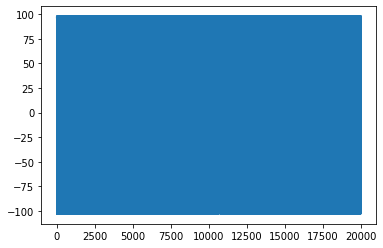

In [29]:
plt.plot(cum_rwd_history)

In [30]:
np.save('best_policy_offensive.npy', Q)

In [34]:
Q = np.random.randn(3**9, 9)
old_Q = Q
episodes = 20000
cum_rwd_history = np.zeros(episodes)
# This one is not working
for episode in range(episodes):
    match = Environment()
    cum_reward = 0
    old_Q = Q

    id_action = 1
    while not match.gameOver:
        rwd = match.opponent_plays()
        id_prev_state = match.state_ids.index(str(match.state.flatten())[1:-1])

        if not match.gameOver:
            # Find an action following an e-greedy strategy
            if np.random.randn() <= epsilon:
                # Explore
                a = np.random.choice(match.available_actions)
            else:
                # Exploit Q values
                q_vals = Q[id_prev_state, :]
                while True:
                    id_best_a = np.argmax(q_vals)
                    a = match.actions[id_best_a]
                    if a in match.available_actions:
                        break
                    else:
                        q_vals[id_best_a] = - np.inf

            id_action = match.actions.index(a)
            # Play the action
            rwd = match.agent_plays(a)

        # Update Q values
        id_next_state = match.state_ids.index(str(match.state.flatten())[1:-1])
        Q[id_prev_state, id_action] = rwd + np.max(Q[id_next_state, :])
        cum_reward += rwd

    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay * episode)
    cum_rwd_history[episode] = cum_reward

    if np.mod(episode + 1, 10) == 0:
        print(np.mean(cum_rwd_history[max(0, episode-10):episode]))

52.77777777777778
-68.3
-38.2
-23.0
-17.9
-38.0
-43.0
-38.0
-43.4
2.1
-8.6
-58.4
-43.1
-57.9
-38.0
-38.1
-43.0
-63.2
-53.4
-38.1
-33.5
-58.2
-58.4
-63.2
-93.4
-33.4
-43.3
-53.3
-73.2
-33.3
-83.0
17.1
-58.2
-38.1
7.0
-38.1
-13.4
-33.4
-3.1
-38.0
-43.3
-33.2
-18.1
-57.7
-53.2
27.0
7.2
-28.2
-53.2
-62.8
-3.3
-28.4
-53.4
-82.9
-33.1
-63.4
-93.2
-48.4
-63.2
1.8
-22.9
-73.2
-43.1
-73.3
-53.4
-38.2
-2.6
1.7
-53.2
-13.1
-42.9
-73.4
-58.3
-63.3
-23.4
-18.5
-98.1
-33.2
-52.9
2.0
27.0
-22.8
-68.3
-38.1
-58.2
-78.5
-2.8
-18.0
-28.3
-63.1
-58.2
-82.7
-18.3
-12.9
2.1
-38.0
-22.6
-63.2
-38.1
-23.1
-83.1
-23.0
-33.5
2.1
-52.8
-58.5
-53.0
7.0
-83.3
-8.0
-13.1
-58.2
-53.5
-28.2
-38.4
-43.0
41.9
2.1
-42.9
-38.4
-98.2
-13.4
-17.8
-13.3
1.7
-78.5
-38.2
-38.4
-18.2
-58.4
-43.0
-22.9
22.1
-68.5
-53.3
-18.0
-53.5
-18.2
11.6
-18.1
42.2
-18.0
-53.0
-63.5
-43.3
-62.7
-68.4
17.0
-42.9
-38.3
-33.2
-43.2
42.1
6.9
-33.3
-58.5
-18.0
-62.9
-18.2
-33.3
-18.5
-38.2
-13.0
-63.4
-88.5
-38.2
-18.2
-52.9
-58.1
-38.2
-3.2
7.

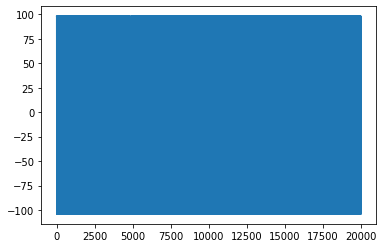

In [35]:
plt.plot(cum_rwd_history)

In [37]:
np.save('best_policy_defensive.npy', Q)